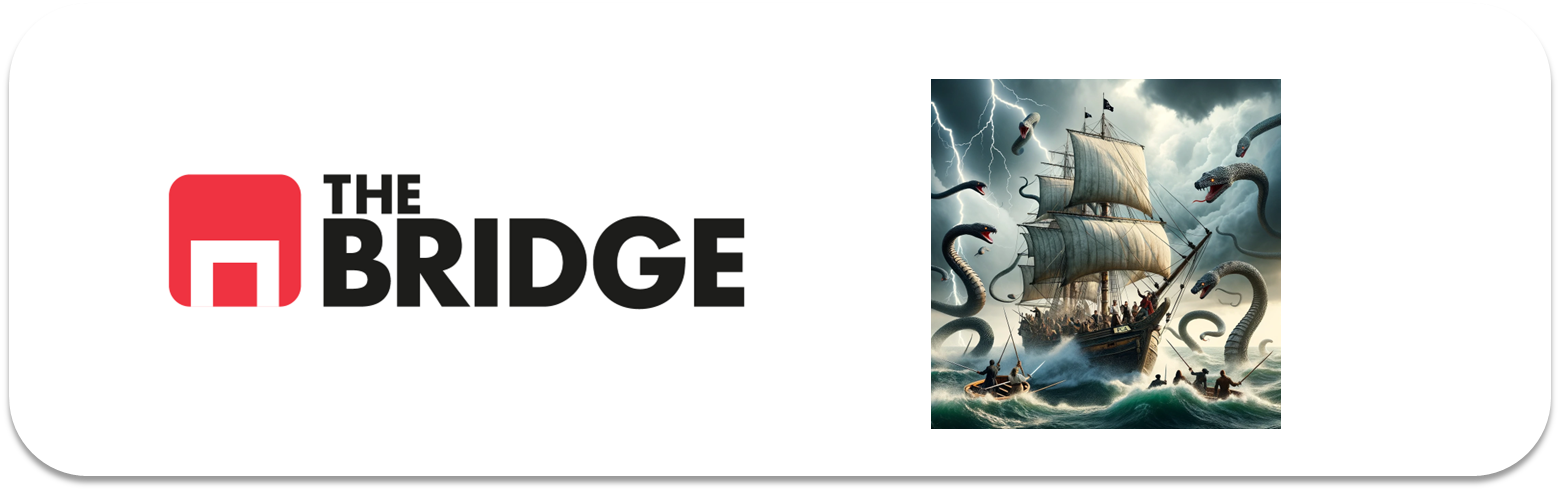

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [6]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

In [7]:
df["NumberOfOpenCreditLinesAndLoans"].value_counts()

NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
36       1
38       1
43       1
48       1
49       1
41       1
40       1
Name: count, dtype: int64

In [8]:
df[ "NumberOfTimes90DaysLate"].value_counts()

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

In [9]:
df[ "NumberRealEstateLoansOrLines"].value_counts()

NumberRealEstateLoansOrLines
0     4233
1     4149
2     2585
3      530
4      179
5       74
6       27
7       13
8        9
9        4
11       4
12       3
16       2
10       2
19       1
13       1
Name: count, dtype: int64

In [10]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

In [11]:
df[ "NumberOfDependents"].value_counts()

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [12]:
cols_with_number = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate",
    "NumberRealEstateLoansOrLines",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfDependents"
]

def categorizar(n):
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    else:
        return "2+"

for col in cols_with_number:
    df[col] = df[col].apply(categorizar).astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      11816 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64 
 2   age                                   11816 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  category
 4   DebtRatio                             11816 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  category
 7   NumberOfTimes90DaysLate               11816 non-null  category
 8   NumberRealEstateLoansOrLines          11816 non-null  category
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  category
 10  NumberOfDependents                    11816 non-null  category
dtypes: cate

1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

In [14]:
target = "SeriousDlqin2yrs"
features_num = df.select_dtypes(include=["int64", "float64"]).columns.to_list()

In [15]:
corr = df[features_num].corr()
serie_corr = np.abs(corr[target])
serie_corr = serie_corr.drop(target)
serie_corr.sort_values(ascending = False)

RevolvingUtilizationOfUnsecuredLines    0.280350
age                                     0.106076
MonthlyIncome                           0.022199
DebtRatio                               0.001666
Name: SeriousDlqin2yrs, dtype: float64

In [16]:
r_minimo = 0.02
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
if target in features_num_sel:
    features_num_sel.remove(target)

features_num_sel

['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']

<Axes: >

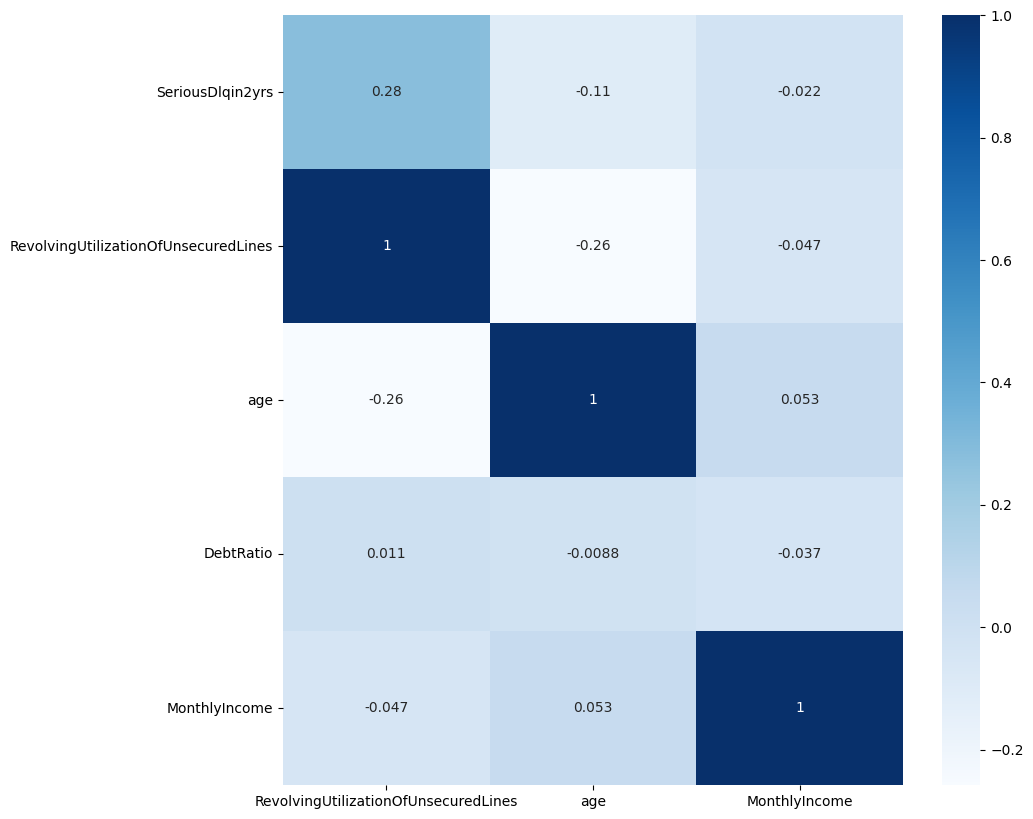

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[features_num_sel], annot= True, cmap= "Blues")

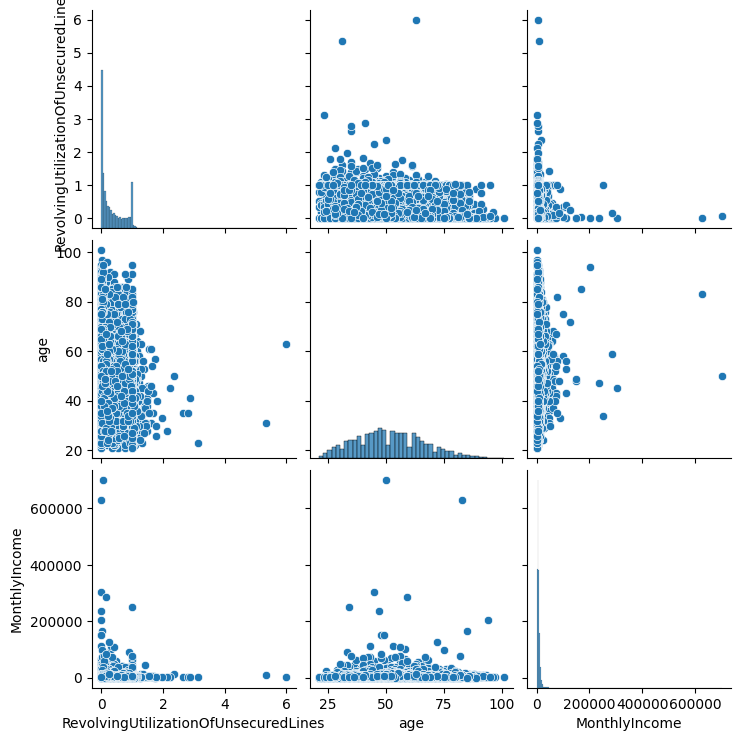

In [18]:
sns.pairplot(df[features_num_sel])

2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [19]:
features_cat = df.select_dtypes(include=["category"]).columns.to_list()
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [20]:
# Mutual information
from sklearn.metrics import mutual_info_score
df_mi = df.dropna()
for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(df_mi[col],df_mi[target]))


MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.022987518602201606
MI(NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 0.003997412558923809
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03489600689053832
MI(NumberRealEstateLoansOrLines;SeriousDlqin2yrs): 0.0012561707862197985
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.019647392003284785
MI(NumberOfDependents;SeriousDlqin2yrs): 0.001170298210723425


In [21]:
features_mutual = [
    "NumberOfTimes90DaysLate",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse"
]
features_mutual

['NumberOfTimes90DaysLate',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [22]:
# SelectKBest
features_num = df.select_dtypes(include=["int64", "float64"]).columns.to_list()
features_num.remove("SeriousDlqin2yrs")

X_train = df[features_num]
y_train = df["SeriousDlqin2yrs"]

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=4)
X_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(X_kbest,columns = selector.get_feature_names_out())
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
0,0.081892,37.0,0.070709,5656.0
1,0.023413,74.0,0.209197,4870.0
2,0.000000,43.0,0.080784,5000.0
3,0.492754,44.0,0.412735,7333.0
4,1.000000,63.0,0.000000,8333.0
...,...,...,...,...
11811,0.197116,59.0,0.290216,5140.0
11812,0.036726,62.0,0.884985,5833.0
11813,0.120313,49.0,0.577676,6333.0
11814,0.252566,63.0,0.037640,14000.0


In [23]:
features_kbest = selector.get_feature_names_out().tolist()
features_kbest

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

In [24]:
# ANOVA
from scipy import stats

clases = df[target].unique()

for col in features_num:
    grupos = [df[df[target] == c][col] for c in clases]
    
    f_val, p_val = stats.f_oneway(*grupos)
    
    print(f"\nVariable: {col}")
    print("Valor F:", f_val)
    print("Valor p:", p_val)


Variable: RevolvingUtilizationOfUnsecuredLines
Valor F: 1007.7408239980396
Valor p: 2.652100176209838e-212

Variable: age
Valor F: 134.44653571156564
Valor p: 6.413858414625236e-31

Variable: DebtRatio
Valor F: 0.032798185157067075
Valor p: 0.856290078074966

Variable: MonthlyIncome
Valor F: 5.824786023093839
Valor p: 0.015817006943526946


In [25]:
features_ANOVA = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "MonthlyIncome"       
]
features_ANOVA

['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']

3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [26]:
target = "SeriousDlqin2yrs"

X = df.drop(columns=[target])
y = df[target]

In [27]:
X_dummies = pd.get_dummies(X, drop_first=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_dummies, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [29]:
from sklearn.feature_selection import SelectFromModel

selector_model = SelectFromModel(
    estimator = rf_selector,
    threshold = "median"
)

selector_model.fit(X_dummies, y)

,"estimator estimator: objectThe base estimator from which the transformer is built.This can be both a fitted (if ``prefit`` is set to True)or a non-fitted estimator. The estimator should have a``feature_importances_`` or ``coef_`` attribute after fitting.Otherwise, the ``importance_getter`` parameter should be used.",RandomForestC...ndom_state=42)
,"threshold threshold: str or float, default=NoneThe threshold value to use for feature selection. Features whoseabsolute importance value is greater or equal are kept while the othersare discarded. If ""median"" (resp. ""mean""), then the ``threshold`` valueis the median (resp. the mean) of the feature importances. A scalingfactor (e.g., ""1.25*mean"") may also be used. If None and if theestimator has a parameter penalty set to l1, either explicitlyor implicitly (e.g, Lasso), the threshold used is 1e-5.Otherwise, ""mean"" is used by default.",'median'
,"prefit prefit: bool, default=FalseWhether a prefit model is expected to be passed into the constructordirectly or not.If `True`, `estimator` must be a fitted estimator.If `False`, `estimator` is fitted and updated by calling`fit` and `partial_fit`, respectively.",False
,"norm_order norm_order: non-zero int, inf, -inf, default=1Order of the norm used to filter the vectors of coefficients below``threshold`` in the case where the ``coef_`` attribute of theestimator is of dimension 2.",1
,"max_features max_features: int, callable, default=NoneThe maximum number of features to select.- If an integer, then it specifies the maximum number of features to allow.- If a callable, then it specifies how to calculate the maximum number of features allowed. The callable will receive `X` as input: `max_features(X)`.- If `None`, then all features are kept.To only select based on ``max_features``, set ``threshold=-np.inf``... versionadded:: 0.20.. versionchanged:: 1.1 `max_features` accepts a callable.",None
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a ``coef_``attribute or ``feature_importances_`` attribute of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case of:class:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each o

In [30]:
selected_features = selector_model.get_feature_names_out()
selected_features

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse_2+',
       'NumberOfTimes90DaysLate_1', 'NumberOfTimes90DaysLate_2+',
       'NumberOfTime60-89DaysPastDueNotWorse_2+'], dtype=object)

In [31]:
X_model = pd.DataFrame(
    selector_model.transform(X_dummies),
    columns = selected_features
)

X_model

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse_2+,NumberOfTimes90DaysLate_1,NumberOfTimes90DaysLate_2+,NumberOfTime60-89DaysPastDueNotWorse_2+
0,0.081892,37.0,0.070709,5656.0,0.0,1.0,0.0,0.0
1,0.023413,74.0,0.209197,4870.0,0.0,0.0,0.0,0.0
2,0.000000,43.0,0.080784,5000.0,0.0,0.0,0.0,0.0
3,0.492754,44.0,0.412735,7333.0,0.0,0.0,0.0,0.0
4,1.000000,63.0,0.000000,8333.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11811,0.197116,59.0,0.290216,5140.0,0.0,0.0,0.0,0.0
11812,0.036726,62.0,0.884985,5833.0,0.0,0.0,0.0,0.0
11813,0.120313,49.0,0.577676,6333.0,0.0,0.0,0.0,0.0
11814,0.252566,63.0,0.037640,14000.0,0.0,0.0,0.0,0.0


In [32]:
selected_features_sfm = selected_features.tolist()
selected_features_sfm

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse_2+',
 'NumberOfTimes90DaysLate_1',
 'NumberOfTimes90DaysLate_2+',
 'NumberOfTime60-89DaysPastDueNotWorse_2+']

4. Selección de las mejores features empleando RFE.

In [33]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state=42)

In [34]:
rfe = RFE(
    estimator = rf_RFE,
    n_features_to_select = 5,
    step = 1
)

In [35]:
rfe.fit(X_dummies, y)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",RandomForestC...ndom_state=42)
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",5
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",1
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0


In [36]:
ranking = pd.DataFrame(
    rfe.ranking_,
    index = X_dummies.columns,
    columns = ["ranking"]
).sort_values("ranking")

ranking

,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfTimes90DaysLate_2+,1
NumberOfTime30-59DaysPastDueNotWorse_2+,2
NumberOfTimes90DaysLate_1,3
NumberOfTime60-89DaysPastDueNotWorse_2+,4
NumberOfTime60-89DaysPastDueNotWorse_1,5
NumberOfDependents_2+,6


In [37]:
selected_features_rfe = ranking[ranking["ranking"] == 1].index.tolist()
selected_features_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate_2+']

5. Selección de las mejores features empleando SFS.

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state=42)

In [39]:
sfs_forward = SequentialFeatureSelector(
    rf_SFS,
    n_features_to_select = 5,
    cv = 4,
    scoring = "balanced_accuracy"
)

In [40]:
sfs_forward.fit(X_dummies, y)

,estimator estimator: estimator instanceAn unfitted estimator.,RandomForestC...ndom_state=42)
,"n_features_to_select n_features_to_select: ""auto"", int or float, default=""auto""If `""auto""`, the behaviour depends on the `tol` parameter:- if `tol` is not `None`, then features are selected while the score change does not exceed `tol`.- otherwise, half of the features are selected.If integer, the parameter is the absolute number of features to select.If float between 0 and 1, it is the fraction of features to select... versionadded:: 1.1 The option `""auto""` was added in version 1.1... versionchanged:: 1.3 The default changed from `""warn""` to `""auto""` in 1.3.",5
,"tol tol: float, default=NoneIf the score is not incremented by at least `tol` between twoconsecutive feature additions or removals, stop adding or removing.`tol` can be negative when removing features using `direction=""backward""`.`tol` is required to be strictly positive when doing forward selection.It can be useful to reduce the number of features at the cost of a smalldecrease in the score.`tol` is enabled only when `n_features_to_select` is `""auto""`... versionadded:: 1.1",None
,"direction direction: {'forward', 'backward'}, default='forward'Whether to perform forward selection or backward selection.",'forward'
,"scoring scoring: str or callable, default=NoneScoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)`` that returns a single value. See :ref:`scoring_callable` for details.- `None`: the `estimator`'s :ref:`default evaluation criterion ` is used.",'balanced_accuracy'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. In all othercases, :class:`~sklearn.model_selection.KFold` is used. These splittersare instantiated with `shuffle=False` so the splits will be the sameacross calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",4
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel. When evaluating a new feature toadd or remove, the cross-validation procedure is parallel over thefolds.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [41]:
selected_features_sfs = sfs_forward.get_feature_names_out()
selected_features_sfs

array(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse_1',
       'NumberOfTime30-59DaysPastDueNotWorse_2+',
       'NumberOfTimes90DaysLate_2+',
       'NumberOfTime60-89DaysPastDueNotWorse_2+'], dtype=object)

 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [42]:
listas = [
    features_num_sel,
    features_mutual,
    features_kbest,
    features_ANOVA,
    selected_features_sfm,
    selected_features_rfe,
    selected_features_sfs
]

In [43]:
from collections import Counter

conteo = Counter()

for lista in listas:
    conteo.update(lista)

conteo

Counter({'RevolvingUtilizationOfUnsecuredLines': 6,
         'age': 5,
         'MonthlyIncome': 5,
         'DebtRatio': 3,
         'NumberOfTimes90DaysLate_2+': 3,
         'NumberOfTime30-59DaysPastDueNotWorse_2+': 2,
         'NumberOfTime60-89DaysPastDueNotWorse_2+': 2,
         'NumberOfTimes90DaysLate': 1,
         'NumberOfTime30-59DaysPastDueNotWorse': 1,
         'NumberOfTime60-89DaysPastDueNotWorse': 1,
         'NumberOfTimes90DaysLate_1': 1,
         'NumberOfTime30-59DaysPastDueNotWorse_1': 1})

In [44]:
import pandas as pd

df_voting = pd.DataFrame.from_dict(conteo, orient='index', columns=['votos'])
df_voting = df_voting.sort_values('votos', ascending=False)
df_voting

,votos
RevolvingUtilizationOfUnsecuredLines,6
age,5
MonthlyIncome,5
DebtRatio,3
NumberOfTimes90DaysLate_2+,3
NumberOfTime60-89DaysPastDueNotWorse_2+,2
NumberOfTime30-59DaysPastDueNotWorse_2+,2
NumberOfTimes90DaysLate,1
NumberOfTime30-59DaysPastDueNotWorse,1
NumberOfTime60-89DaysPastDueNotWorse,1


In [45]:
features_finales = df_voting[df_voting['votos'] >= 3].index.to_list()
features_finales

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'DebtRatio',
 'NumberOfTimes90DaysLate_2+']

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [46]:
nombres_listas = [
    "NumSel",
    "MutualInfo",
    "KBest",
    "ANOVA",
    "SFM",
    "RFE",
    "SFS"
]


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

modelos = {
    "LogReg": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss")
}

In [49]:
from sklearn.model_selection import cross_val_score
import pandas as pd

resultados = []

for nombre_lista, lista_features in zip(nombres_listas, listas):
    X_fs = X_dummies[lista]

    for nombre_modelo, modelo in modelos.items():
        scores = cross_val_score(
            modelo,
            X_fs,
            y,
            cv = 5,
            scoring = "recall_macro"
        )

        resultados.append({
            "feature_set": nombre_lista,
            "modelo": nombre_modelo,
            "recall_medio": scores.mean(),
            "recall_std": scores.std()
        })

df_resultados = pd.DataFrame(resultados).sort_values("recall_medio", ascending=False)
df_resultados

,feature_set,modelo,recall_medio,recall_std
1,NumSel,RandomForest,0.604850,0.014811
4,MutualInfo,RandomForest,0.604850,0.014811
16,RFE,RandomForest,0.604850,0.014811
10,ANOVA,RandomForest,0.604850,0.014811
7,KBest,RandomForest,0.604850,0.014811
19,SFS,RandomForest,0.604850,0.014811
13,SFM,RandomForest,0.604850,0.014811
2,NumSel,XGBoost,0.591582,0.005431
17,RFE,XGBoost,0.591582,0.005431
20,SFS,XGBoost,0.591582,0.005431


In [51]:
mejor = df_resultados.iloc[0]

mejor_feature_set = mejor["feature_set"]
mejor_modelo_nombre = mejor["modelo"]

print("Mejor feature set:", mejor_feature_set)
print("Mejor modelo:", mejor_modelo_nombre)

Mejor feature set: NumSel
Mejor modelo: RandomForest


4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [56]:
mejor_features = features_num_sel

In [57]:
X_best = X_dummies[mejor_features]

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_best,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight= "balanced")

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = "recall_macro",
    n_jobs = -1
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor recall CV:", grid.best_score_)

Mejores parámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor recall CV: 0.7258892083560001


In [62]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

mejor_modelo_final = grid.best_estimator_

y_pred = mejor_modelo_final.predict(X_test)

print("Recall macro en test:", recall_score(y_test, y_pred, average="macro"))
print()
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

Recall macro en test: 0.7298612100814541

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2198
           1       0.19      0.69      0.29       166

    accuracy                           0.77      2364
   macro avg       0.58      0.73      0.58      2364
weighted avg       0.92      0.77      0.82      2364


[[1699  499]
 [  52  114]]


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.